In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import json
from scipy.interpolate import griddata
from collections import deque
from itertools import product
# from multiprocessing import Pool, cpu_count
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import splprep, splev
from functools import partial
from pathos.multiprocessing import ProcessingPool as Pool
from scipy.stats import norm
from matplotlib.backends.backend_pdf import PdfPages
import pdb
import functools
import pickle
import matplotlib.gridspec as gridspec
from PIL import Image
import copy

from matsim import *

plt.style.use('pcb')

In [2]:
from utils import SpaceScan, linear_roots

In [3]:
filename = 'data/dlif_refined_inh.pickle'
with open(filename, 'rb') as file:
    dlif_res = pickle.load(file)

filename = 'data/hhdt_refined_inh.pickle'
with open(filename, 'rb') as file:
    hhdt_res = pickle.load(file)

In [5]:
hh_data_root = 'HH/data/'
hh_res = {}
hh_names = ['clas','musc','dynt']

for name in hh_names:
    filename = hh_data_root + f'res_{name}_area_inh.pickle'

    with open(filename, 'rb') as file:
        hh_res[name] = pickle.load(file)
        
lif_data_root = 'LIF/data/'
lif_res = {}
lif_names = ['dlif']

for name in lif_names:
    filename = lif_data_root + f'res_{name}_area_inh.pickle'

    with open(filename, 'rb') as file:
        lif_res[name] = pickle.load(file)

In [6]:
scan_lif = SpaceScan(dlif_res, q=1)
scan_hh = SpaceScan(hhdt_res, q=1)

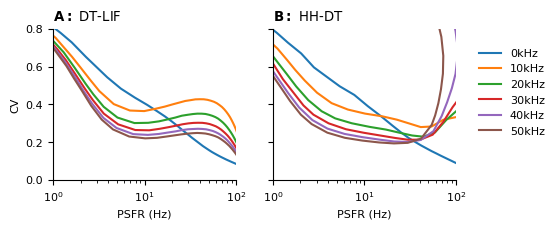

In [7]:
fig, axes = plt.subplots(ncols=2, figsize=(5.2, 2), sharey=True)

ax = axes[0]

for inh, res in scan_lif.res.items():
    if inh <= 100:
        ax.plot(res[:,1], res[:,2])
ax.set_title(r'${\bf A:}$ DT-LIF', loc='left')
        
ax = axes[1]

for inh, res in scan_hh.res.items():
    if inh <= 100:
        ax.plot(res[:,1], res[:,2], label=f'{inh:.0f}kHz', clip_on=True)
ax.legend(bbox_to_anchor=(1.1, .9), loc='upper left', borderaxespad=0., frameon=False)
ax.set_title(r'${\bf B:}$ HH-DT', loc='left')
        
for ax in axes.flat:
    ax.set_xlim(1,100)
    ax.set_xscale('log')
    ax.set_ylim(0,.8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('PSFR (Hz)')
axes[0].set_ylabel('CV')

plt.savefig('img/const_inh_contours.png')